In [32]:
#impor the libraries and read the dataset
import pandas as pd
import numpy as np
import datetime
from google.colab import drive
df = pd.read_csv("accidents.csv")



In [ ]:
df.head(2)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN


In [ ]:
# select on the the first five columns
df2 = df.iloc[:, 0:5]
df2

In [ ]:
#drop row beyond 2020
df3 = df2[df2['JAHR']< 2021]
df3

In [74]:
#filter for Alkoholunfälle'in the category column
df4= df3[df3['MONATSZAHL']== 'Alkoholunfälle']
df4

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
25,Alkoholunfälle,insgesamt,2020,Summe,430.0
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
...,...,...,...,...,...
591,Alkoholunfälle,Verletzte und Getötete,2000,200008,32.0
592,Alkoholunfälle,Verletzte und Getötete,2000,200009,45.0
593,Alkoholunfälle,Verletzte und Getötete,2000,200010,31.0
594,Alkoholunfälle,Verletzte und Getötete,2000,200011,24.0


In [75]:
#drop the null entries in the month column
df4= df4[df4['MONAT']!= 'Summe']
df4

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
26,Alkoholunfälle,insgesamt,2020,202001,28.0
27,Alkoholunfälle,insgesamt,2020,202002,40.0
28,Alkoholunfälle,insgesamt,2020,202003,27.0
29,Alkoholunfälle,insgesamt,2020,202004,26.0
30,Alkoholunfälle,insgesamt,2020,202005,40.0
...,...,...,...,...,...
591,Alkoholunfälle,Verletzte und Getötete,2000,200008,32.0
592,Alkoholunfälle,Verletzte und Getötete,2000,200009,45.0
593,Alkoholunfälle,Verletzte und Getötete,2000,200010,31.0
594,Alkoholunfälle,Verletzte und Getötete,2000,200011,24.0


In [76]:
df4['JAHR']=pd.to_datetime(df4['JAHR'],format='%Y')
df4['JAHR']=pd.DatetimeIndex(df4['JAHR']).year
df4['MONAT']=pd.to_datetime(df4['MONAT'], format='%Y%m')
#df4['MONAT']=pd.DatetimeIndex(df4['MONAT']).month
df4.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
591,Alkoholunfälle,Verletzte und Getötete,2000,2000-08-01,32.0
592,Alkoholunfälle,Verletzte und Getötete,2000,2000-09-01,45.0
593,Alkoholunfälle,Verletzte und Getötete,2000,2000-10-01,31.0
594,Alkoholunfälle,Verletzte und Getötete,2000,2000-11-01,24.0
595,Alkoholunfälle,Verletzte und Getötete,2000,2000-12-01,31.0


In [77]:
df4.tail()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
591,Alkoholunfälle,Verletzte und Getötete,2000,2000-08-01,32.0
592,Alkoholunfälle,Verletzte und Getötete,2000,2000-09-01,45.0
593,Alkoholunfälle,Verletzte und Getötete,2000,2000-10-01,31.0
594,Alkoholunfälle,Verletzte und Getötete,2000,2000-11-01,24.0
595,Alkoholunfälle,Verletzte und Getötete,2000,2000-12-01,31.0


In [79]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 26 to 595
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   MONATSZAHL   504 non-null    object        
 1   AUSPRAEGUNG  504 non-null    object        
 2   JAHR         504 non-null    int64         
 3   MONAT        504 non-null    datetime64[ns]
 4   WERT         504 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 23.6+ KB


In [80]:
df4

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
26,Alkoholunfälle,insgesamt,2020,2020-01-01,28.0
27,Alkoholunfälle,insgesamt,2020,2020-02-01,40.0
28,Alkoholunfälle,insgesamt,2020,2020-03-01,27.0
29,Alkoholunfälle,insgesamt,2020,2020-04-01,26.0
30,Alkoholunfälle,insgesamt,2020,2020-05-01,40.0
...,...,...,...,...,...
591,Alkoholunfälle,Verletzte und Getötete,2000,2000-08-01,32.0
592,Alkoholunfälle,Verletzte und Getötete,2000,2000-09-01,45.0
593,Alkoholunfälle,Verletzte und Getötete,2000,2000-10-01,31.0
594,Alkoholunfälle,Verletzte und Getötete,2000,2000-11-01,24.0


In [81]:
df4.to_csv('accidents_cleaned.csv', encoding = 'utf-8-sig') 

In [20]:
import seaborn as sns
sns.set(style="white", color_codes=True)

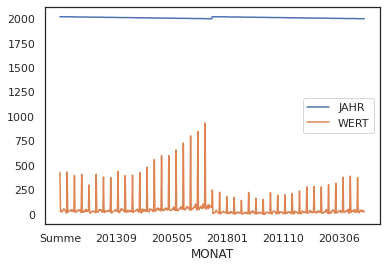

In [27]:
df4.plot('MONAT')